# **Deep Learning**
*   **Neural Network**
1. Convolutional Neural Networks (CNNs)
2. Long Short Term Memory Networks (LSTMs)
3. Recurrent Neural Networks (RNNs)
4. Restricted Boltzmann Machines( RBMs)
5. Multilayer Perceptrons (MLPs)

In [5]:
!pip install tensorflow
!pip install keras

In [6]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [7]:
x=df.iloc[:,3:13].values
y=df.iloc[:,13].values
print(x)
print(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=1)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [8]:
from sklearn.preprocessing import LabelEncoder
en1=LabelEncoder()
x[:,1]=en1.fit_transform(x[:,1])
en2=LabelEncoder()
x[:,2]=en2.fit_transform(x[:,2])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=1)
from  sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [10]:
# from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
history = model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train ,batch_size=10, epochs = 5)

Epoch 1/5
750/750 [==============================] - 3s 2ms/step - loss: 0.4043 - accuracy: 0.8327
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3556 - accuracy: 0.8547
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8572
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3400 - accuracy: 0.8616
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8640


In [12]:
print(model.predict(sc.transform([[619,0,0,42,2,40000,1,1,1,101348]])))

1/1 [==============================] - 0s 168ms/step
[[0.2699675]]


# Full code & Plot

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Churn_Modelling.csv")

x = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values
en1 = LabelEncoder()
x[:, 1] = en1.fit_transform(x[:, 1])
en2 = LabelEncoder()
x[:, 2] = en2.fit_transform(x[:, 2])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
750/750 [==============================] - 3s 2ms/step - loss: 0.4045 - accuracy: 0.8299 - val_loss: 0.3487 - val_accuracy: 0.8552
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3568 - accuracy: 0.8563 - val_loss: 0.3427 - val_accuracy: 0.8564
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3453 - accuracy: 0.8555 - val_loss: 0.3457 - val_accuracy: 0.8552
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3407 - accuracy: 0.8596 - val_loss: 0.3353 - val_accuracy: 0.8628
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3334 - accuracy: 0.8604 - val_loss: 0.3411 - val_accuracy: 0.8592
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3301 - accuracy: 0.8621 - val_loss: 0.3455 - val_accuracy: 0.8576
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3268 - accuracy: 0.8668 - val_loss: 0.3392 - val_accuracy: 0.8564

Epoch 58/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1047 - accuracy: 0.9557 - val_loss: 0.8789 - val_accuracy: 0.8100
Epoch 59/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1121 - accuracy: 0.9528 - val_loss: 0.8470 - val_accuracy: 0.8144
Epoch 60/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1066 - accuracy: 0.9541 - val_loss: 0.9012 - val_accuracy: 0.8236
Epoch 61/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0917 - accuracy: 0.9607 - val_loss: 0.9398 - val_accuracy: 0.8144
Epoch 62/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0947 - accuracy: 0.9625 - val_loss: 0.9496 - val_accuracy: 0.8076
Epoch 63/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0921 - accuracy: 0.9609 - val_loss: 0.9322 - val_accuracy: 0.8088
Epoch 64/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1024 - accuracy: 0.9576 - val_loss: 0.9529 - val_accuracy:

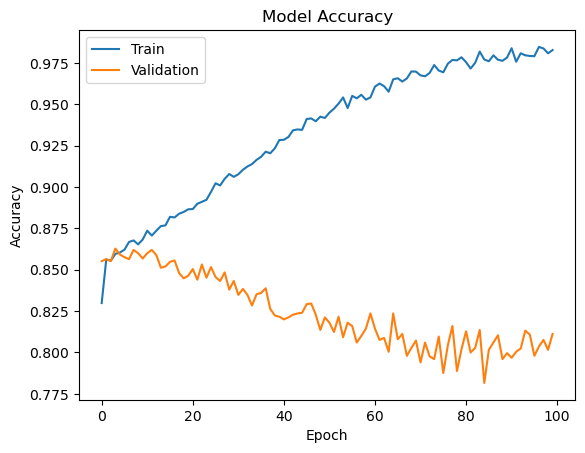

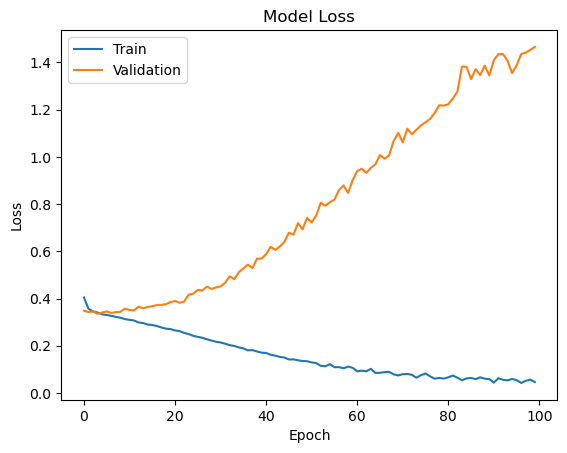

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()